# STAT 159 Final Project - Group 22

## A three-year dataset supporting research on building energy management and occupancy analytics

**Research Question**: How is the energy consumption of the building influenced by various factors?

**Authors**: Aoyu, Emma, Hamsa, Reuel

## Introduction 

In this notebook, we are providing the functions and code we used to conduct the analysis in the main notebook.

**C02 Emissions Hourly**

In [1]:
import os
import glob
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np
from tools import timeseries as ts

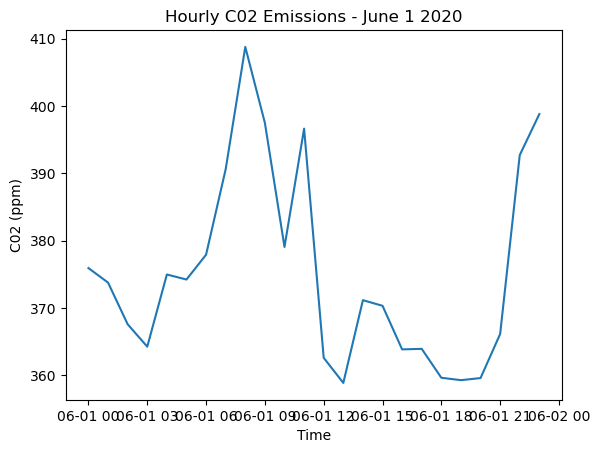

In [2]:
# Plot the co2 rate hourly on June 1
data1 = ts.retrieve('2020-06-01 00:00:00', '2020-06-02 00:00:00', 'zone_co2.csv')
hourly1 = ts.hourly('2020-06-01 00:00:00', '2020-06-02 00:00:00', data1)

plt.plot(hourly1['date'], hourly1['zone_022_co2'])
plt.xlabel('Time')
plt.ylabel('C02 (ppm)')
plt.title("Hourly C02 Emissions - June 1 2020")

plt.show()

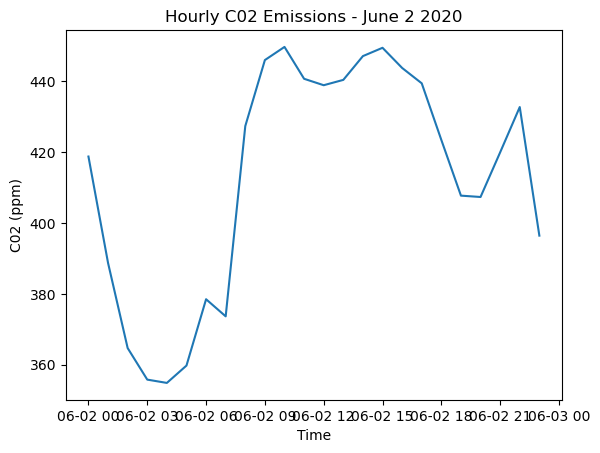

In [3]:
# Plot the co2 rate hourly on June 2
data2 = ts.retrieve('2020-06-02 00:00:00', '2020-06-03 00:00:00', 'zone_co2.csv')
hourly2 = ts.hourly('2020-06-02 00:00:00', '2020-06-03 00:00:00', data2)

plt.plot(hourly2['date'], hourly2['zone_022_co2'])
plt.xlabel('Time')
plt.ylabel('C02 (ppm)')
plt.title("Hourly C02 Emissions - June 2 2020")

plt.show()

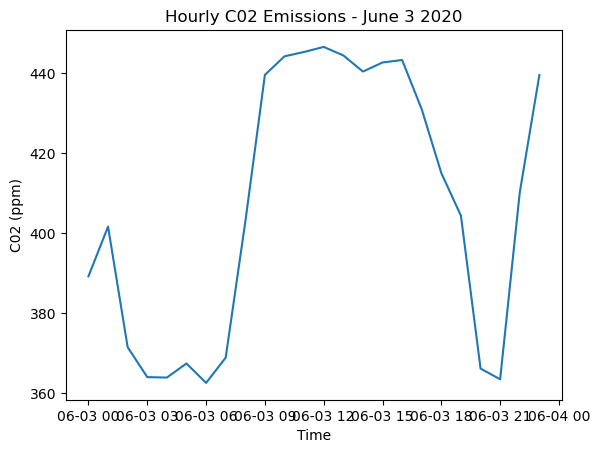

In [4]:
# Plot the co2 rate hourly on June 3
data3 = ts.retrieve('2020-06-03 00:00:00', '2020-06-04 00:00:00', 'zone_co2.csv')
hourly3 = ts.hourly('2020-06-03 00:00:00', '2020-06-04 00:00:00', data3)

plt.plot(hourly3['date'], hourly3['zone_022_co2'])
plt.xlabel('Time')
plt.ylabel('C02 (ppm)')
plt.title("Hourly C02 Emissions - June 3 2020")

plt.show()

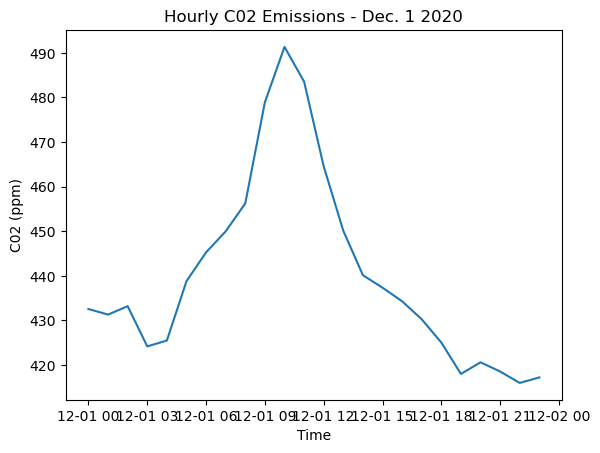

In [5]:
# Plot the co2 rate hourly on December 1

data_dec = ts.retrieve('2020-12-01 00:00:00', '2020-12-05 00:00:00', 'zone_co2.csv')
hourly_dec1 = ts.hourly('2020-12-01 00:00:00', '2020-12-02 00:00:00', data_dec)

plt.plot(hourly_dec1['date'], hourly_dec1['zone_022_co2'])
plt.xlabel('Time')
plt.ylabel('C02 (ppm)')
plt.title("Hourly C02 Emissions - Dec. 1 2020")

plt.show()

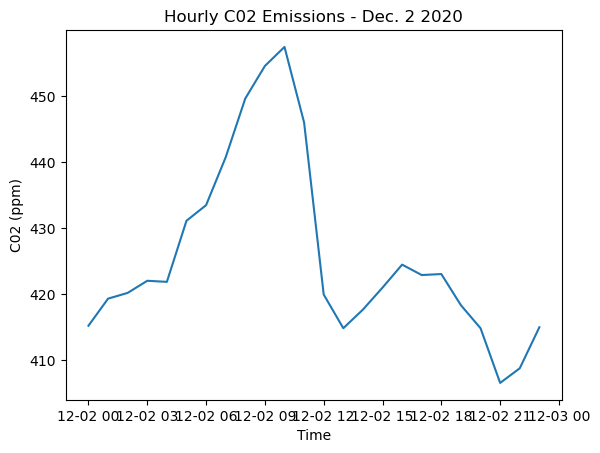

In [6]:
# Plot the co2 rate hourly on December 2

hourly_dec1 = ts.hourly('2020-12-02 00:00:00', '2020-12-03 00:00:00', data_dec)

plt.plot(hourly_dec1['date'], hourly_dec1['zone_022_co2'])
plt.xlabel('Time')
plt.ylabel('C02 (ppm)')
plt.title("Hourly C02 Emissions - Dec. 2 2020")

plt.show()

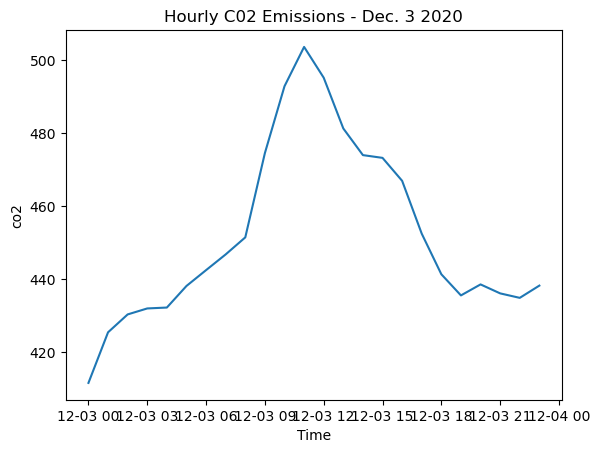

In [7]:
# Plot the co2 rate hourly on December 3

hourly_dec1 = ts.hourly('2020-12-03 00:00:00', '2020-12-04 00:00:00', data_dec)

plt.plot(hourly_dec1['date'], hourly_dec1['zone_022_co2'])
plt.xlabel('Time')
plt.ylabel('co2')
plt.title("Hourly C02 Emissions - Dec. 3 2020")

plt.show()

**Occupancy level and outdoor weather impact on energy consumption**

In [8]:
weather_data = ts.retrieve('2018-08-10 00:00:00', '2018-08-17 00:00:00', 'site_weather.csv')

In [9]:
hourly_data = ts.rtu_energy_hourly('2018-08-10 00:00:00', '2018-08-17 00:00:00', 3)

In [10]:
daily_data = ts.rtu_energy_daily('2018-08-10 00:00:00', '2018-08-17 00:00:00', 3)

KeyboardInterrupt: 

In [17]:
occupancy = ts.retrieve('2018-08-10 00:00:00', '2018-08-17 00:00:00', 'occ.csv')

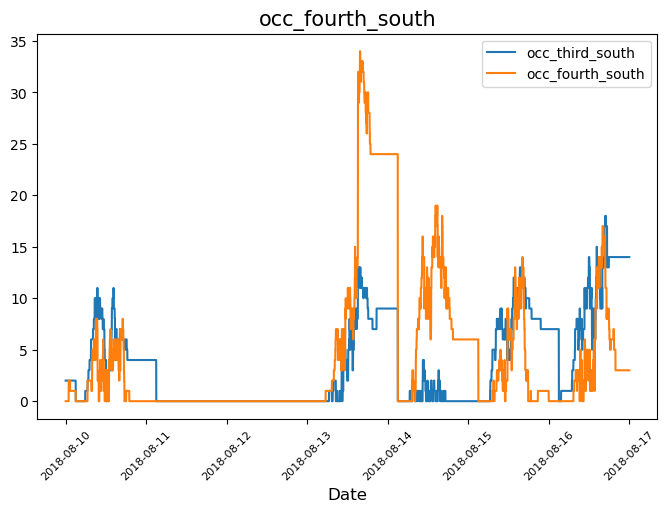

In [19]:
ts.ts_plot(occupancy, ['occ_third_south', 'occ_fourth_south'], [8, 5], separate = False)

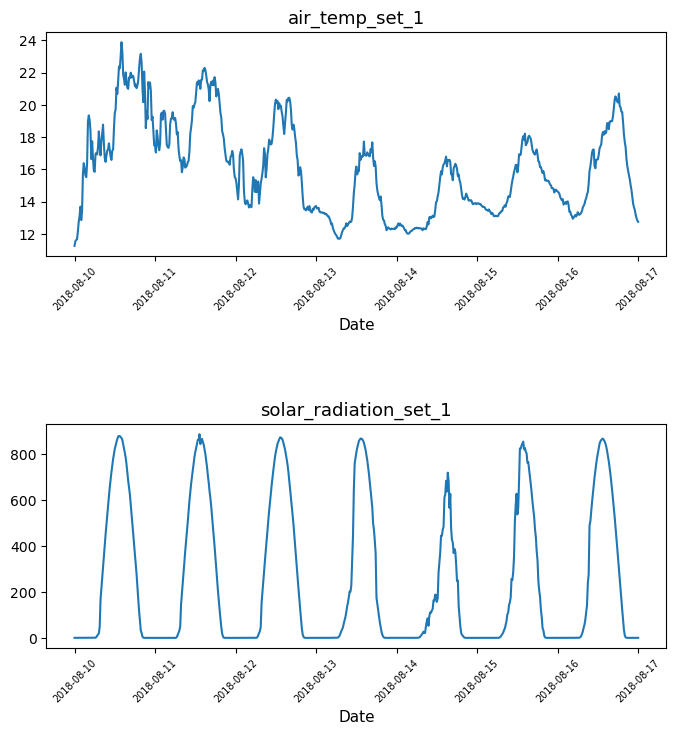

In [20]:
ts.ts_plot(weather_data, ['air_temp_set_1', 'solar_radiation_set_1'], [8, 8], separate = True)


In [21]:
meter = ts.retrieve('2018-08-10 00:00:00', '2018-08-17 00:00:00', 'ele.csv')

In [22]:
meter_hourly = ts.hourly('2018-08-10 00:00:00', '2018-08-17 00:00:00', meter)

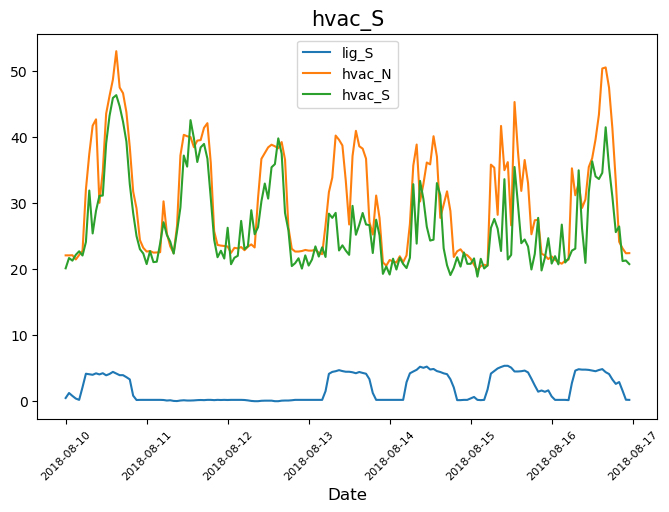

In [23]:
ts.ts_plot(meter_hourly, ['lig_S', 'hvac_N', 'hvac_S'], [8, 5], separate = False)

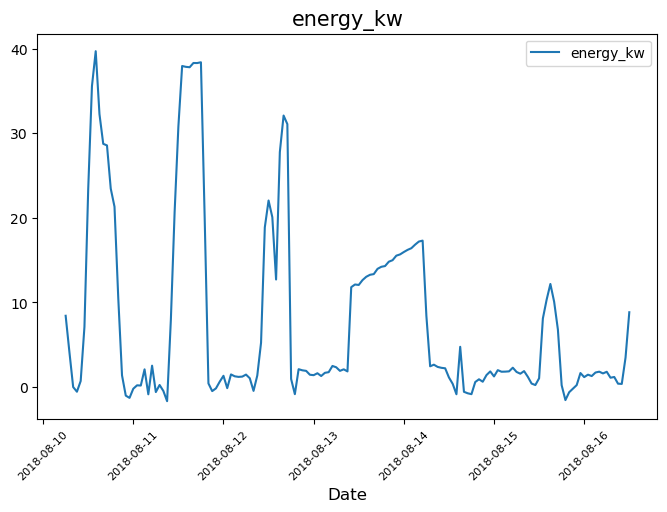

In [24]:
ts.ts_plot(hourly_data, ['energy_kw'], [8, 5], separate = True)

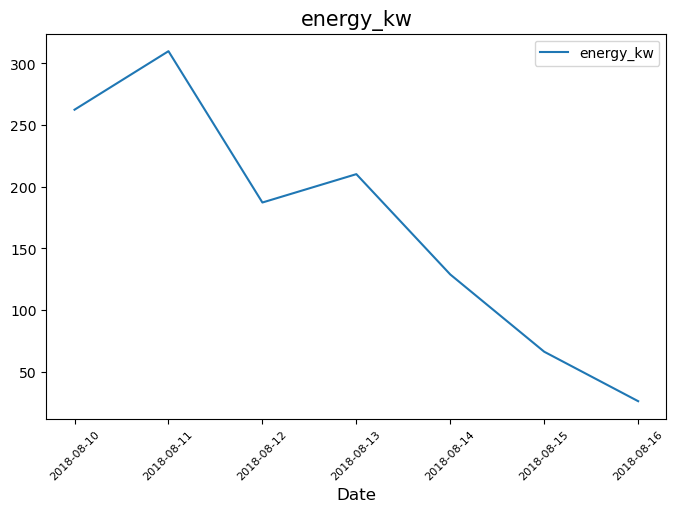

In [26]:
ts.ts_plot(daily_data, ['energy_kw'], [8, 5], separate = True)


**Comparing co2 emission to interior temperature** 

In [27]:
int_temp = ts.retrieve('2020-07-01 00:00:00', '2020-08-01 00:00:00', 'zone_temp_interior.csv')


In [29]:
co2 = ts.retrieve('2020-07-01 00:00:00', '2020-08-01 00:00:00', 'zone_co2.csv')

In [30]:
ele = ts.retrieve('2020-07-01 00:00:00', '2020-08-01 00:00:00', 'ele.csv')


In [31]:
hourly_co2 = ts.hourly('2020-07-01 00:00:00', '2020-08-01 00:00:00', co2)


In [49]:
co2_mean = ts.avg_data(hourly_co2, 'average co2')

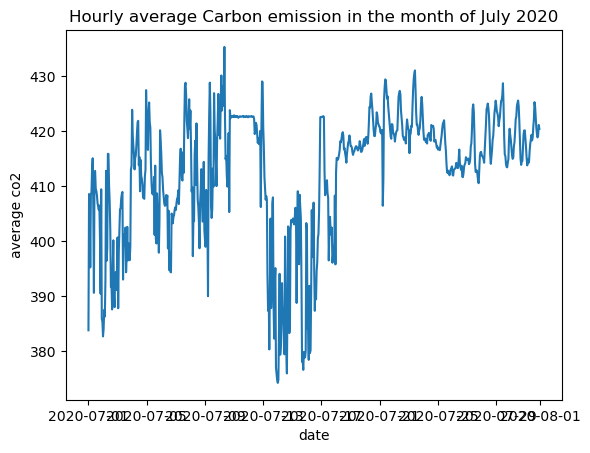

In [50]:
plt.plot(co2_mean['date'], co2_mean['average co2'])
plt.ylabel('average co2')
plt.xlabel('date')
plt.title('Hourly average Carbon emission in the month of July 2020');

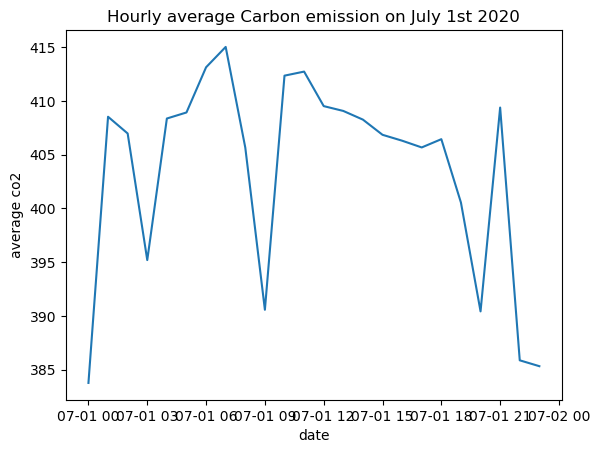

In [36]:
plt.plot(co2_mean['date'].head(24), co2_mean['average co2'].head(24))
plt.ylabel('average co2')
plt.xlabel('date')
plt.title('Hourly average Carbon emission on July 1st 2020');

In [38]:
hourly_int_temp = ts.hourly('2020-07-01 00:00:00', '2020-08-01 00:00:00', int_temp)

In [51]:
int_temp_mean = ts.avg_data(hourly_int_temp, 'average interior temperature')


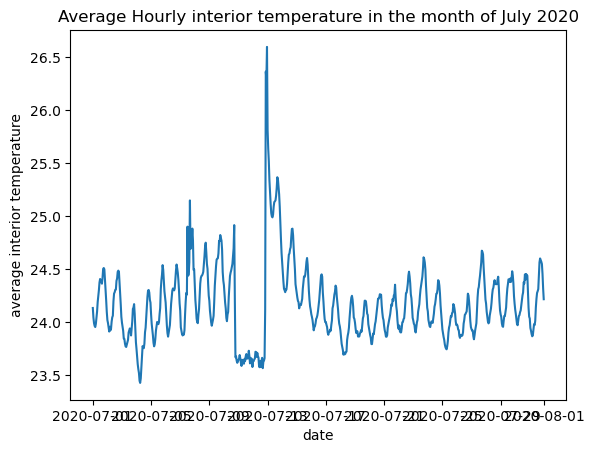

In [52]:
plt.plot(int_temp_mean['date'], int_temp_mean['average interior temperature'])
plt.ylabel('average interior temperature')
plt.xlabel('date')
plt.title('Average Hourly interior temperature in the month of July 2020');

Text(0.5, 1.0, 'Hourly average interior temperature on July 1st 2020')

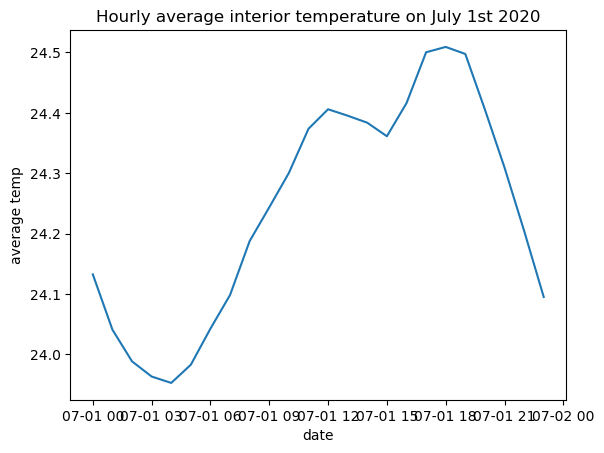

In [41]:
plt.plot(int_temp_mean['date'].head(24), int_temp_mean['average interior temperature'].head(24))
plt.ylabel('average temp')
plt.xlabel('date')
plt.title('Hourly average interior temperature on July 1st 2020')

In [42]:
combined_df = co2_mean.head(24).merge(int_temp_mean.head(24), on = 'date')


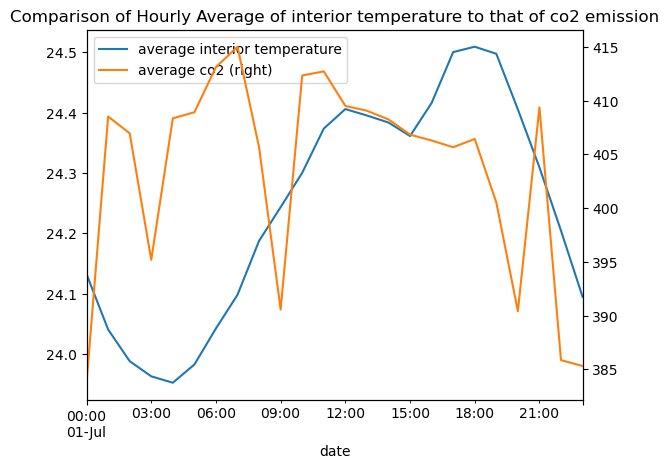

In [43]:
fig, ax = plt.subplots()
combined_df.plot(x = 'date', y = 'average interior temperature', ax = ax) 
combined_df.plot(x = 'date', y = 'average co2', ax = ax, secondary_y = True) 
plt.title('Comparison of Hourly Average of interior temperature to that of co2 emission');

In [44]:
hourly_ele = ts.hourly('2020-07-01 00:00:00', '2020-07-02 00:00:00', ele)
ele_mean = avg_data(hourly_ele, 'average energy usage')

In [45]:
combined_ele_temp = ele_mean.merge(int_temp_mean.head(24), on = 'date')


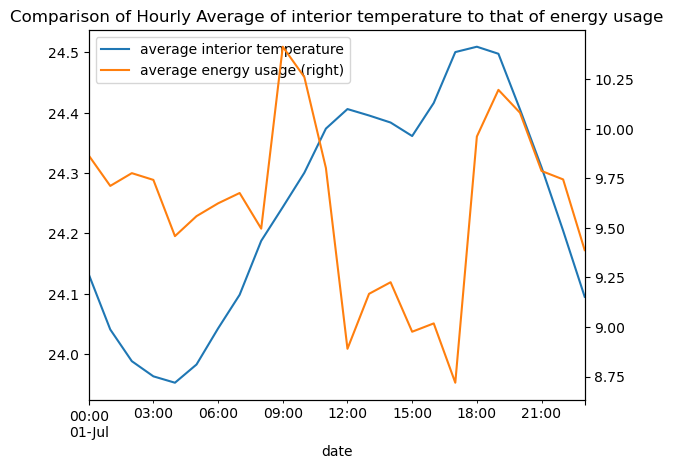

In [46]:
fig, ax = plt.subplots()
combined_ele_temp.plot(x = 'date', y = 'average interior temperature', ax = ax) 
combined_ele_temp.plot(x = 'date', y = 'average energy usage', ax = ax, secondary_y = True) 
plt.title('Comparison of Hourly Average of interior temperature to that of energy usage');

In [47]:
combined_ele_co2 = ele_mean.merge(co2_mean.head(24), on = 'date')


<AxesSubplot: >

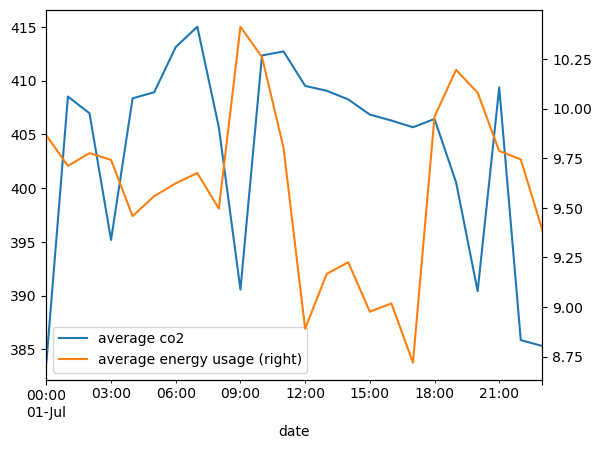

In [48]:
fig, ax = plt.subplots()
combined_ele_co2.plot(x = 'date', y = 'average co2', ax = ax) 
combined_ele_co2.plot(x = 'date', y = 'average energy usage', ax = ax, secondary_y = True) 